# Chapter 4 - Classification
Chapter 3 discussed real-valued response variables (regression problems). This chapter will discuss qualitative (categorical) variables (classification problems). Classification problems can be thought of as regression problems since most of the models return a probability of being in a certain class. Since probabilities take on real values the problem can also be called regression - as in logistic regression - a machine learning technique that is used for classificaiton but returns probabilities as real values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
default = pd.read_csv("data/default.csv")

In [3]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


(-100, 2500)

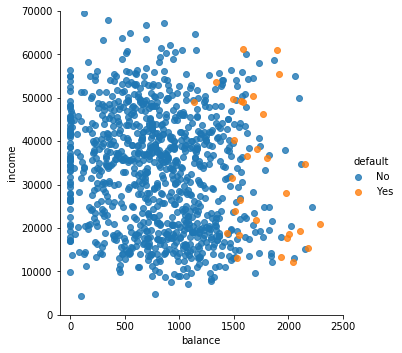

In [4]:
sns.lmplot('balance', 'income', data=default.sample(1000), hue='default', fit_reg=False)
plt.ylim([0,70000])
plt.xlim([-100,2500])

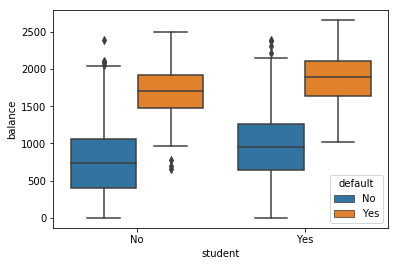

In [5]:
# evidence tha
sns.boxplot('student', 'balance', data=default, hue='default');

# Why not linear regression
Though it is always possible to use numeric values for the categories of the response, there generally is no natural way to order and separate the values in a way that makes sense. Only in a two-category problem will the ordering make sense but even then linear regression will produce probability estimates outside of [0, 1].

In [6]:
import statsmodels.formula.api as smf

In [7]:
# make column for Yes defaults
default['Yes'] = (default['default'] == 'Yes').astype(int)

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


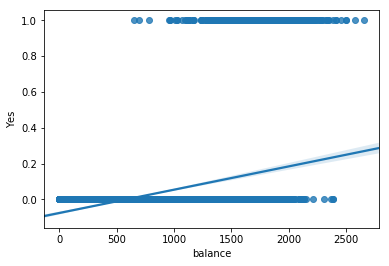

In [8]:
# linear regression model for default
# not ideal and could be made better by simply making all probabilites < 0 equal to 0
# and all probabilites > 1 equal to 1
sns.regplot('balance', 'Yes', data=default)

# Logistic regression
Find function that always outputs number between 0 and 1. Many functions satisfy this condition. For logistic regression the ... logistic function! is used.

$$y = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

Many times you will see this as the sigmoid function in a simpler format

$$y = \frac{1}{1 + e^{-t}}$$

Where $t$ is just the normal linear model $t = \beta_0 + \beta_1X$. Some algebra can be used to show the two equations above are equivalent.

y can now be thought as the probability given some value X since it will always be between 0 and 1. Some more algebra can show that $$log{\frac{p(X)}{1 - p(X)}} = \beta_0 + \beta_1X$$

Where $y$ has been replaced by $p(X)$, the probability of $X$. The expression $\frac{p(X)}{1 - p(X)}$ is known as the 'odds'. So for instance if you are gambling and think that Clinton will win the presidency 80% of the time. The odds would be .8/.2 = 4 or said "4 to 1". For every 4 times she wins, Trump will win once.

What logistic regression is saying, that the log odds are modeled by a linear model which can be solved by linear regression. This has the literal meaning of - given a one unit increase in one of the variables (say $X_1$), a $\beta_1$ increase will occur to the log-odds. Or equivalently, the odds will be multiplied by $e^{\beta_1}$.

In our election example, $X_1$ could be the percentage of voters under 30 and $\beta_1$ could be .5. That would mean if $X_1$ were to increase by 1 percentage point, Clinton's log odds would increase by .5. In our example from above, Clinton's log odds would go from 4 to 4.5 and her probability of winning would go from 80% to 4.5 / 5.5 or 82%

There is no straight-line relationship between the probability of being in a certain class and X in logistic regression because of the need to have probabilities between 0 and 1

# Estimating coefficients through Maximum Likelihood
In linear regression, the model coefficients were found by minimizing the squared residuals. In logistic regression, we maximize the probabilities of all points by a method called maximum likelihood. Maximum likelihood multiplies the model probability for each observation together and chooses parameters that maximize this number. The log likelihood is actually used as numerical underflow will be a problem for must problems with a non-trivial amount of data.

In [9]:
# Think about doing a maximum likelihood example with 4 coin tosses and 3 heads.
# Start with .5 then choose .6 and see the differences

In [10]:
results = smf.logit('Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                  0.4534
Time:                        02:54:00   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

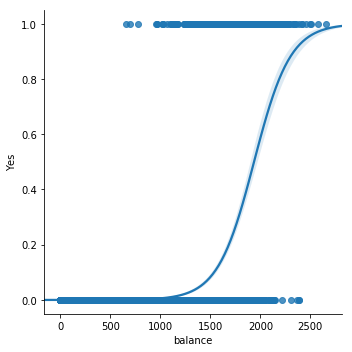

In [12]:
# Looks quite a bit different than the linear regression model
sns.lmplot('balance', 'Yes', data=default, logistic=True)

## Interpretation
For every one dollar increase in balance the log odds increases by .0555. The log odds when there is no balance is -10.6

In [13]:
# p / (1 - p) = 
odds = np.exp(-10.65)
odds

2.3700841597751968e-05

In [14]:
# (1 - p) / p = 1 / odds
one_over_odds = 1 / odds

In [15]:
# 1/p = one_over_odds + 1
one_over_p = one_over_odds + 1

In [16]:
# p = 1 / one_over_p

In [17]:
# since p is so close to 0, p / (1 - p) is nearly equivalent to p
p = 1 / one_over_p
p

2.370027988117268e-05

### Scikit-learn for easier prediction

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# this actually uses regularization by default which will be covered in later chapters
lr = LogisticRegression()

In [20]:
X = np.column_stack((np.ones(len(default)), default['balance']))

In [21]:
lr.fit(X, default['Yes'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Model coefficients are different by B1 is very similar
lr.coef_

array([[-5.16481986,  0.00530575]])

In [23]:
# predict 2000 dollar balance default
lr.predict_proba([[1, 1000]]) # 99 percent chance no default

array([[0.99346413, 0.00653587]])

In [24]:
# predict 2000 dollar balance default
lr.predict_proba([[1, 2000]]) ## 55 percent chance default

array([[0.42999758, 0.57000242]])

In [25]:
# predict 3000 dollar balance default
lr.predict_proba([[1, 3000]]) ## >99 percent chance default

array([[0.00372998, 0.99627002]])

### Multiple Linear Regression
More than 1 predictor.

In [26]:
results = smf.logit('Yes ~ balance + student', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                  0.4619
Time:                        02:54:57   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Simpsons paradox

In [28]:
results = smf.logit('Yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                0.004097
Time:                        02:54:58   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

The first model above with both balance and student show a negative relationship between student and default - meaning that being a student decreases the likelihood of defaulting. The second model shows the opposite, that being a student increases the chance at defaulting. This can be explained by the fact that students have more debt on average but compared to those with the same amount of debt they are less likely to default.

### Multiclass Logistic Regression
The book unfortunately does not cover logistic regression with more than 2 classes, though this is a common occurrence in many real life problems.

### One vs All
A simple method when you have k classes where k > 2 is to create k-1 independent logistic regression classifiers by choosing the response variable to be binary, 1 when in the current class else 0.

### Linear Discriminant Analysis
Not to be confused with latent dirichlet allocation. Used for multiclass classificaion problems.   LDA assumes all perdictor variables come from a gaussian distribution and estimates the mean and variance for each predictor variable where the variance is the same across for each predictor variable. It also estimates a prior probability simply by using the proporiton of classes in the training set. 

Bayes rule is used to compute a probability for each class. When there is more than one predictor, a multivariate gaussian is used. Correlations between each predictor must be estimated (the covariance matrix) as they are a parameter to the multivariate gaussian.

### Stock market prediciton lab

In [29]:
smarket = pd.read_csv('data/smarket.csv')
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [30]:
smarket['Up'] = np.where(smarket['Direction'] == 'Up', 1, 0)

In [31]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Up
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Up,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


In [32]:
X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values
y = smarket['Up'].values

In [33]:
train_bool = smarket['Year'].values < 2005
X_train = X[train_bool]
X_test = X[~train_bool]
y_train = y[train_bool]
y_test = y[~train_bool]

In [34]:
results = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data=smarket).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691327
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                0.001651
Time:                        02:54:58   Log-Likelihood:                -864.16
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# true on the left axis, predicted above
confusion_matrix(y_test, lr.predict(X_test))

array([[ 37,  74],
       [ 30, 111]], dtype=int64)

In [38]:
147/ len(y_test)

0.5833333333333334

Out of the 68 predicted down, 37 actually were down days. 54% accurracy  
Out of the 184 predicted up, 110 actually were up. 60% accuracy.  
58% total accuracy

In [39]:
y_pred = lr.predict(X_test)

In [40]:
y_pred[y_test == 1]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [42]:
lda = LinearDiscriminantAnalysis()

In [43]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [44]:
#almost exact same as logistic regression
confusion_matrix(y_test, lda.predict(X_test))

array([[ 37,  74],
       [ 30, 111]], dtype=int64)

In [45]:
lda.priors_

array([0.49198397, 0.50801603])

In [46]:
# use QDA with only 2 variables
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[:,:2], y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [47]:
#almost exact same as logistic regression
confusion_matrix(y_test, qda.predict(X_test[:,:2]))

array([[ 30,  81],
       [ 20, 121]], dtype=int64)

In [48]:
# knn
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)

In [50]:
knn.fit(X_train[:,:2], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
confusion_matrix(y_test, knn.predict(X_test[:,:2]))

array([[48, 63],
       [55, 86]], dtype=int64)

### Exercises

# 1
Turn equation 4.2 to 4.3

4.2
$$p(x) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

4.3
$$\frac{p(x)}{1 - p(x)} = e^{\beta_0 + \beta_1X}$$

First, multiply 4.2 by negative 1 and add 1 to both sides
$$1 - p(x) = 1 - \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$
Simplify right hand side
$$1 - p(x) = \frac{1}{1 + e^{\beta_0 + \beta_1X}}$$
Now just divide 4.2 by the last equation and you have the result

# 2 
Prove that 4.13 maximizes 4.12.

Since log is a monotone increasing function, maximizing the log of a function will also maximize the original function. After taking the log of 4.12 all constants can be dropped and you are left with the 4.13.

# 3
Prove that QDA is quadratic with one predictor

This is show by taking the log of 4.12 and throwing away all terms that don't depend on k. An extra term will be left attached to $x^2$ thus making it quadratic. This term disappears in LDA because all the variances are the same.

# 4
It's easiest to think in terms of each X in a range of 0 - 100
a) 10 / 100 = 10%  
b) 10 x 10 / (100 x 100) = 1%  
c) $10^{-100}$. The fraction of nearest neighbors is $10^{-p}$  
d) even in 2 dimensions only 1% of neighbors will be within 5% on either side  
e) 10% for p=1.
Generalizing we get $.1^{1/p}$

# 5
a) QDA on training. LDA on test  
b) QDA on both  
c) Since QDA is a quadratic model, more data should improve the model faster than LDA  
d) False, QDA will overfit by finding a different variance for each class when in reality the variance for each class are the same

# 6

In [52]:
# a
b0 = -6
b1 = .05
b2 = 1
x1 = 40
x2 = 3.5
t = -6 + b1 * x1 + b2 * x2
print("student has a {:.3f} probability of getting an A".format(1 / (1 + np.exp(-t))))

#b. solve for t = 0. Since an odds of 1 corresponds to 50/50 chance and log(1) = 0
# 0 = -6 + b1 * x1 + b2 * x2
hours = (6 - b2 * x2) / b1
print("student needs to study {} hours to have a 50% chance at an A".format(1 / (1 + np.exp(-t))))

student has a 0.378 probability of getting an A
student needs to study 0.3775406687981454 hours to have a 50% chance at an A


In [53]:
# double check 50%
b0 = -6
b1 = .05
b2 = 1
x1 = 50
x2 = 3.5
t = -6 + b1 * x1 + b2 * x2
1 / (1 + np.exp(-t))

0.5

# 7

In [54]:
# 7
prior = .8
mu_d = 10
mu_no_d = 0
sigma = 6
normal = lambda x, m, s: 1 / np.sqrt(2 * np.pi * s ** 2) * np.exp(-(x - m) ** 2 / (2 * s ** 2))

In [55]:
f_d = normal(4, 10, 6)
f_no_d = normal(4, 0, 6)
f_d, f_no_d

(0.0403284540865239, 0.053241334253725375)

In [56]:
# bayes
prob_div = prior * f_d / (prior * f_d + (1 - prior) * f_no_d)
print("Probability of dividend is {:.3f}".format(prob_div))

Probability of dividend is 0.752


# 8
Since knn with k equal to 1 always picks itself, its training error is 0. Meaning in the given example the test error is .36 and worse than logistic regression.

# 9

In [57]:
# a
# p / (1 - p) = .37
# 1 / p - 1 = 1 / .37
odds = .37
one_over_p = 1 + 1 / odds
p = 1 / one_over_p
print("The probability of defaulting with odds of {} are {:.2f}".format(odds, p))
print("The odds of defaulting with probability .16 are {:.2f}".format(.16 / .84))

The probability of defaulting with odds of 0.37 are 0.27
The odds of defaulting with probability .16 are 0.19


# 10

In [58]:
weekly = pd.read_csv("data/weekly.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [59]:
# strongest correlations with today are lag1 and lag3
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [60]:
today = weekly['Today']

In [61]:
today_perc = (100 + today) / 100

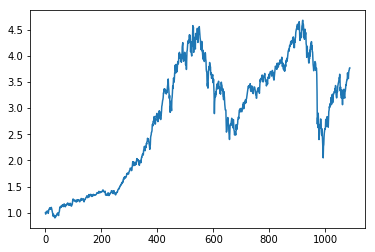

In [62]:
today_perc.cumprod().plot()

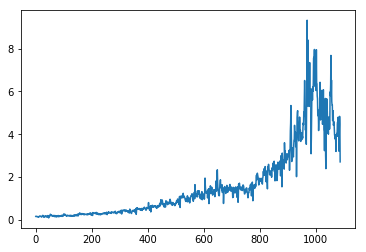

In [63]:
weekly['Volume'].plot()

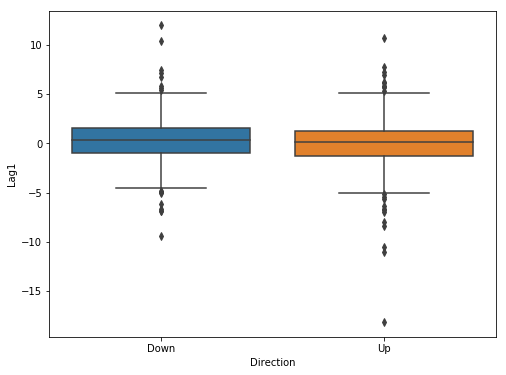

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot('Direction', 'Lag1', data=weekly)

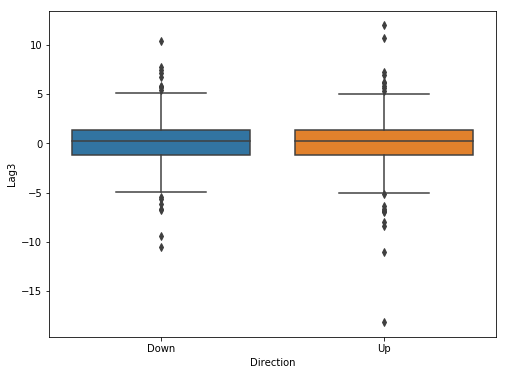

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot('Direction', 'Lag3', data=weekly)

In [66]:
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

In [67]:
# wow lag2 is statistically significant
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                0.006580
Time:                        02:55:00   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [68]:
# wow lag2 is statistically significant
results = smf.logit('Direction ~ Lag2', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                0.003866
Time:                        02:55:00   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                   0.01617
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.026      2.382      0.017       0.011       0.114
==============================================================================
"""

In [69]:
predictions = np.where(results.predict(weekly) > .5, 1, 0)

In [70]:
confusion_matrix(weekly['Direction'], predictions)

array([[ 33, 451],
       [ 26, 579]], dtype=int64)

In [71]:
451 / 1030 

0.43786407766990293

In [72]:
weekly['Direction'].mean()

0.5555555555555556

The default prediciton is Up - about 95% of the predictions are up and it actually gets 56.2% correct but that's only slightly higher than the 55.6% total up days.

In [73]:
# use sklearn for rest of problems
year_bool = weekly['Year'] < 2009
weekly['ones'] = 1
X_train = weekly[year_bool][['ones', 'Lag2']].values
X_test = weekly[~year_bool][['ones', 'Lag2']].values
y_train = weekly[year_bool]['Direction'].values
y_test = weekly[~year_bool]['Direction'].values

In [74]:
lr =  LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
# not bad
confusion_matrix(y_test, lr.predict(X_test))

array([[ 9, 34],
       [ 5, 56]], dtype=int64)

In [76]:
# e
# use LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
confusion_matrix(y_test, lda.predict(X_test))

array([[ 9, 34],
       [ 5, 56]], dtype=int64)

In [77]:
# terrible
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([[43,  0],
       [61,  0]], dtype=int64)

In [78]:
# very poor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[21, 22],
       [30, 31]], dtype=int64)

In [79]:
# h
# logistic regression and LDA work the best

In [80]:
# i
# not bad when predicting up
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[20, 23],
       [20, 41]], dtype=int64)

In [81]:
# try many combinations
results = smf.logit('Direction ~ np.power(Lag5, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686956
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:               8.318e-06
Time:                        02:55:00   Log-Likelihood:                -748.09
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.9112
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2256      0.065      3.475      0.001       0.098       0.353
np.power(Lag5, 2)    -0.0004      0.004     -0.112      0.911      -0.008       0.007
=====================================================================================
"""

In [82]:
# try many combinations
results = smf.logit('Direction ~ np.power(Volume, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686884
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:               0.0001136
Time:                        02:55:00   Log-Likelihood:                -748.02
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.6801
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2359      0.068      3.448      0.001       0.102       0.370
np.power(Volume, 2)    -0.0024      0.006     -0.413      0.680      -0.014       0.009
=======================================================================================
"""

In [83]:
# try many combinations
results = smf.logit('Direction ~ Volume * Lag3', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686505
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:               0.0006650
Time:                        02:55:00   Log-Likelihood:                -747.60
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.8025
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2631      0.084      3.134      0.002       0.099       0.428
Volume         -0.0235      0.036     -0.649      0.516      -0.095       0.048
Lag3           -0.0188      0.039     -0.482      0.630      -0.095       0.058
Volume:Lag3    -0.0007      0.011     -0.067      0.946      -0.022       0.020
===============================================================================
"""

### 12

In [84]:
# a
auto = pd.read_csv('data/auto.csv')

In [94]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [85]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)

In [86]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = auto[['cylinders', 'origin']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [88]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.9285714285714286

In [89]:
X = auto[['cylinders', 'origin', 'year', 'acceleration']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [90]:
# slightly higher with more variables
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.8979591836734694

In [95]:
# Quite a bit better with all variables and high regularlization
lr = LogisticRegression(C=.01)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.8367346938775511

In [96]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9489795918367347

In [97]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.9489795918367347

In [98]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [99]:
# looks like 18-32 for K yields the best results
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    print('With K={} accuracy is {:.3f}'.format(k, accuracy))

With K=1 accuracy is 0.878
With K=2 accuracy is 0.888
With K=3 accuracy is 0.898
With K=4 accuracy is 0.898
With K=5 accuracy is 0.867
With K=6 accuracy is 0.898
With K=7 accuracy is 0.888
With K=8 accuracy is 0.908
With K=9 accuracy is 0.908
With K=10 accuracy is 0.898
With K=11 accuracy is 0.908
With K=12 accuracy is 0.908
With K=13 accuracy is 0.908
With K=14 accuracy is 0.908
With K=15 accuracy is 0.898
With K=16 accuracy is 0.898
With K=17 accuracy is 0.888
With K=18 accuracy is 0.918
With K=19 accuracy is 0.918
With K=20 accuracy is 0.918
With K=21 accuracy is 0.908
With K=22 accuracy is 0.908
With K=23 accuracy is 0.908
With K=24 accuracy is 0.918
With K=25 accuracy is 0.908
With K=26 accuracy is 0.918
With K=27 accuracy is 0.918
With K=28 accuracy is 0.918
With K=29 accuracy is 0.918
With K=30 accuracy is 0.918
With K=31 accuracy is 0.918
With K=32 accuracy is 0.918
With K=33 accuracy is 0.908
With K=34 accuracy is 0.908
With K=35 accuracy is 0.898
With K=36 accuracy is 0.908
W

# 12

In [100]:
power = lambda x, a: x ** a

In [101]:
power(3, 8)

6561

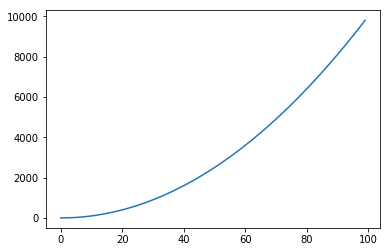

In [102]:
n = 100
plt.plot(range(n), [power(x, 2) for x in range(n)])

In [103]:
def plot_power(rng, p):
    plt.plot(rng, [power(x, p) for x in rng])

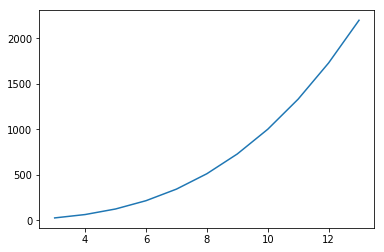

In [104]:
plot_power(range(3,14), 3)

# 13

In [105]:
boston = pd.read_csv('data/boston.csv')
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [106]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.905511811023622

In [107]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.8740157480314961

In [108]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8503937007874016

### End of Chapter 4